In [90]:
import numpy as np
import pandas as pd
from pylab import plot,show,hist,bar
%config IPCompleter.greedy=True


In [91]:
data = pd.read_csv("../data/train.csv",sep="\t")
#data = pd.read_csv("../data/test.csv",sep="\t")

# Overall description 

In [3]:
print data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 67.9+ MB
None


### Observations
1. Few category names missing
2. 42% of brand_name in missing 1

In [39]:
print data.head()

   train_id                                 name  item_condition_id  \
0         0  MLB Cincinnati Reds T Shirt Size XL                  3   
1         1     Razer BlackWidow Chroma Keyboard                  3   
2         2                       AVA-VIV Blouse                  1   
3         3                Leather Horse Statues                  1   
4         4                 24K GOLD plated rose                  1   

                                       category_name brand_name  price  \
0                                  Men/Tops/T-shirts        NaN   10.0   
1  Electronics/Computers & Tablets/Components & P...      Razer   52.0   
2                        Women/Tops & Blouses/Blouse     Target   10.0   
3                 Home/Home Décor/Home Décor Accents        NaN   35.0   
4                            Women/Jewelry/Necklaces        NaN   44.0   

   shipping                                   item_description  
0         1                                 No description yet 

In [40]:
data.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [41]:
data.describe(include=['O'])

,name,category_name,brand_name,item_description
count,1482535,1476208,849853,1482531
unique,1225273,1287,4809,1281426
top,Bundle,"Women/Athletic Apparel/Pants, Tights, Leggings",PINK,No description yet
freq,2232,60177,54088,82489


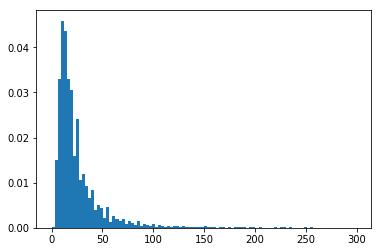

In [42]:
hist(x=data[data.price<300].price,bins=100,normed=True)
show()

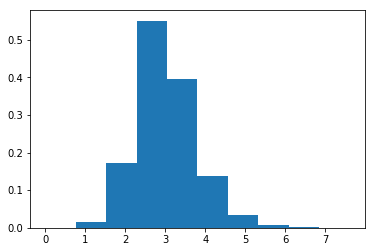

In [ ]:
hist(x=np.log(data.price+1),normed=True)
show()


### observation
1. Price is highly skewed
2. Log price looks good

# Item_condition_id

In [44]:
print data.item_condition_id.unique()

[3 1 2 4 5]


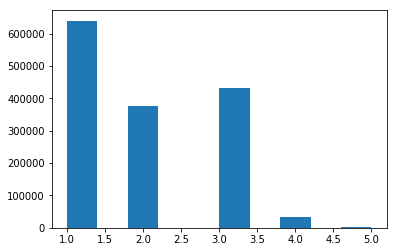

In [45]:
hist(data.item_condition_id)
show()

In [46]:
data[['price','item_condition_id']].groupby('item_condition_id').describe()

price                                                \
                      count       mean        std  min   25%   50%    75%   
item_condition_id                                                           
1                  640549.0  26.486967  35.418024  0.0  10.0  18.0  30.00   
2                  375479.0  27.563225  42.125698  0.0  11.0  17.0  29.00   
3                  432161.0  26.540711  40.030681  0.0  11.0  16.0  28.00   
4                   31962.0  24.349212  35.679148  0.0  10.0  15.0  26.00   
5                    2384.0  31.703859  39.531069  0.0  11.0  19.0  35.25   

                           
                      max  
item_condition_id          
1                  2009.0  
2                  2004.0  
3                  2000.0  
4                  1309.0  
5                   522.0

In [47]:
data[['price','item_condition_id']].groupby('item_condition_id').median()

,price
item_condition_id,
1,18.0
2,17.0
3,16.0
4,15.0
5,19.0


### observation 
1. 5 condition is really low , but has the highest median price ( maybe means good condition )
2. 4 count is low , even its median price is low ( maybe means really bad condition )

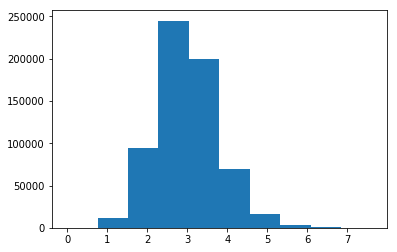

In [54]:
hist(np.log(data[data.item_condition_id==1].price+1))
show()

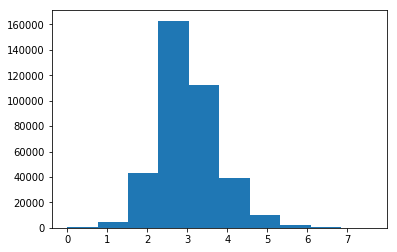

In [56]:
hist(np.log(data[data.item_condition_id==2].price+1))
show()

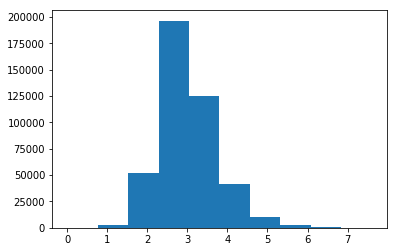

In [59]:
hist(np.log(data[data.item_condition_id==3].price+1))
show()

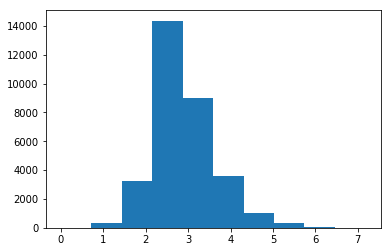

In [58]:
hist(np.log(data[data.item_condition_id==4].price+1))
show()

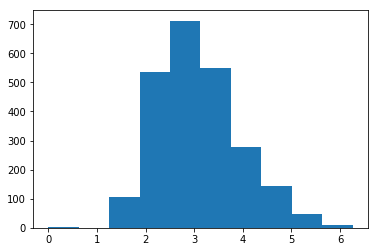

In [57]:
hist(np.log(data[data.item_condition_id==5].price+1))
show()

###  observation 
1. from log price plot we see , that almost for all categories the distribution is same except that it is somewhat different for 5th

# Category_name  





In [4]:
print data.category_name[:10]

0                                    Men/Tops/T-shirts
1    Electronics/Computers & Tablets/Components & P...
2                          Women/Tops & Blouses/Blouse
3                   Home/Home Décor/Home Décor Accents
4                              Women/Jewelry/Necklaces
5                                    Women/Other/Other
6                             Women/Swimwear/Two-Piece
7                      Sports & Outdoors/Apparel/Girls
8                      Sports & Outdoors/Apparel/Girls
9             Vintage & Collectibles/Collectibles/Doll
Name: category_name, dtype: object


In [5]:
print len(data.category_name.unique())

1288


In [65]:
data['Cat1']=data.category_name.str.split('/').str.get(0)
data['Cat2']=data.category_name.str.split('/').str.get(1)
data['Cat3']=data.category_name.str.split('/').str.get(2)


In [7]:
print data.head()

   train_id                                 name  item_condition_id  \
0         0  MLB Cincinnati Reds T Shirt Size XL                  3   
1         1     Razer BlackWidow Chroma Keyboard                  3   
2         2                       AVA-VIV Blouse                  1   
3         3                Leather Horse Statues                  1   
4         4                 24K GOLD plated rose                  1   

                                       category_name brand_name  price  \
0                                  Men/Tops/T-shirts        NaN   10.0   
1  Electronics/Computers & Tablets/Components & P...      Razer   52.0   
2                        Women/Tops & Blouses/Blouse     Target   10.0   
3                 Home/Home Décor/Home Décor Accents        NaN   35.0   
4                            Women/Jewelry/Necklaces        NaN   44.0   

   shipping                                   item_description         Cat1  \
0         1                                 No de

### Cat1

In [8]:
len(data.Cat1.unique())

11

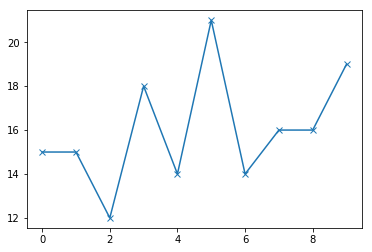

In [37]:
plot(xrange(10),data[['price','Cat1']].groupby(['Cat1']).median(),'-x')
show()

In [26]:
data[['price','Cat1']].groupby(['Cat1']).describe()#.sort_values(by='count', ascending=False)

price                                               \
                           count       mean        std  min   25%   50%   75%   
Cat1                                                                            
Beauty                  207828.0  19.671536  21.360135  0.0  10.0  15.0  24.0   
Electronics             122690.0  35.173922  65.419784  0.0   9.0  15.0  31.0   
Handmade                 30842.0  18.156572  27.758289  0.0   6.0  12.0  20.0   
Home                     67871.0  24.536599  24.417061  0.0  12.0  18.0  29.0   
Kids                    171689.0  20.642315  22.730876  0.0  10.0  14.0  24.0   
Men                      93680.0  34.708614  41.240057  0.0  14.0  21.0  40.0   
Other                    45351.0  20.809817  29.847758  0.0   9.0  14.0  23.0   
Sports & Outdoors        25342.0  25.532219  29.302234  0.0  11.0  16.0  28.0   
Vintage & Collectibles   46530.0  27.339426  53.507495  0.0  10.0  16.0  27.0   
Women                   664385.0  28.885496  39.443853  0.0  12.0  19.0  33.0   

                                
                           max  
Cat1                            
Beauty                  2000.0  
Electronics             1909.0  
Handmade                1750.0  
Home                     848.0  
Kids                     809.0  
Men                     1309.0  
Other                   1400.0  
Sports & Outdoors        915.0  
Vintage & Collectibles  1709.0  
Women                   2009.0

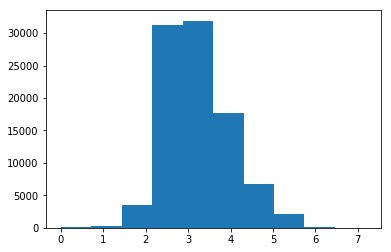

In [14]:
hist(np.log(data[data['Cat1']=='Men'].price+1))
show()

####  likewise we could find out the fit for other 11 unique cat1 types

####  cat2

In [29]:
data[['price','Cat2']].groupby(['Cat2']).describe()

price                                          \
                              count       mean         std  min   25%   50%   
Cat2                                                                          
Accessories                  8213.0  18.897358   28.549315  0.0   6.0  10.0   
Antique                      6093.0  24.739373   34.879419  3.0  10.0  16.0   
Apparel                      2918.0  16.386566   13.325440  3.0  10.0  13.0   
Art                           656.0  14.748476   16.272747  0.0   6.0  10.0   
Artwork                      1264.0  13.996440   18.344492  0.0   5.0  10.0   
Athletic Apparel           134383.0  28.460940   23.945737  0.0  14.0  22.0   
Automotive                   2480.0  21.546774   31.613786  0.0   7.0  13.0   
Bags and Purses              6338.0  61.790944  122.821950  0.0  15.0  28.0   
Bath                         1192.0  17.280201   12.131051  3.0  10.0  14.0   
Bath & Body                  7758.0  19.084687   18.151481  0.0   9.0  15.0   
Bathing & Skin Care           744.0  15.922043   10.122366  3.0   9.0  13.0   
Bedding                      4229.0  30.688815   24.065881  0.0  16.0  25.0   
Blazers & Sport Coats          69.0  27.463768   16.416974  3.0  16.0  24.0   
Book                         1642.0  19.292326   22.330350  0.0   8.0  12.0   
Books                        7794.0  16.194509   14.899919  0.0   8.0  11.0   
Books and Zines                46.0  14.239130   17.111640  3.0   7.0  10.0   
Boys (4+)                   14747.0  27.849325   29.906969  0.0  12.0  18.0   
Boys 0-24 Mos               15372.0  17.000618   14.213401  0.0   9.0  14.0   
Boys 2T-5T                  14382.0  18.791267   14.189807  0.0  10.0  15.0   
Cameras & Photography        3976.0  71.343813   96.705241  0.0  19.0  40.0   
Candles                        64.0  21.734375   19.301486  3.0  10.0  16.0   
Car Audio, Video & GPS        516.0  37.874031   39.331521  3.0  15.0  25.0   
Car Seats & Accessories       920.0  26.528261   40.159005  3.0  10.0  15.0   
Cell Phones & Accessories   53290.0  30.142278   62.938841  0.0   8.0  11.0   
Ceramics and Pottery           57.0  20.280702   15.337576  3.0   9.0  15.0   
Children                     1242.0  12.664251   13.630351  3.0   7.0   9.0   
Cleaning Supplies            2367.0  23.198141   14.776585  0.0  14.0  20.0   
Clothing                     8330.0  19.213565   18.048563  3.0  10.0  15.0   
Coats & Jackets             18391.0  34.136208   31.870916  0.0  16.0  26.0   
Collectibles                 5811.0  24.341852   31.051399  3.0  11.0  16.0   
...                             ...        ...         ...  ...   ...   ...   
Quilts                         31.0  12.258065   12.143497  3.0   5.0   8.0   
Safety                        400.0  36.797500   41.840448  0.0  11.0  19.0   
Seasonal Décor               4867.0  18.896035   17.439104  0.0  10.0  14.0   
Serving                      1886.0  25.797985   18.891257  3.0  16.0  22.0   
Shoes                      100452.0  41.811223   42.933959  0.0  18.0  29.0   
Shorts                       1466.0  18.490450   15.437872  0.0  10.0  14.0   
Skin Care                   29838.0  20.497721   24.361659  0.0  10.0  14.0   
Skirts                      10625.0  21.546541   15.626252  0.0  12.0  18.0   
Storage & Organization       2879.0  17.975339   13.802806  0.0  10.0  14.0   
Strollers                     477.0  67.280922   84.207606  3.0  18.0  36.0   
Suits                          66.0  37.151515   26.221097  6.0  21.0  30.0   
Suits & Blazers              1911.0  19.193616   12.105997  0.0  12.0  16.0   
Supplies                     1112.0  20.937050   19.703737  3.0  10.0  16.0   
Sweaters                    35752.0  26.290893   22.067080  0.0  13.0  20.0   
Sweats & Hoodies             8275.0  27.631903   24.213459  0.0  15.0  21.0   
Swimwear                    18924.0  21.682467   19.535591  0.0  12.0  16.0   
TV, Audio & Surveillance     9123.0  44.159542   49.431791  0.0  14.0  26.0   
T

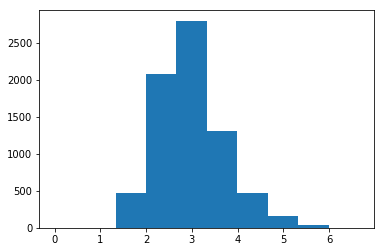

In [30]:
hist(np.log(data[data['Cat2']=='Toy'].price+1))
show()

#### find out others

####  cat3

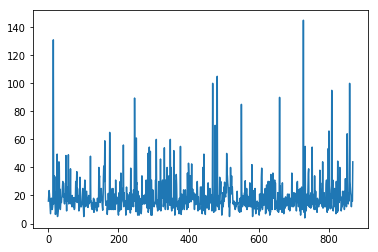

In [33]:
plot(xrange(870),data[['price','Cat3']].groupby(['Cat3']).median())

.

##  shipping


In [48]:
data[['shipping','price']].groupby(['shipping']).describe()

price                                                    
             count       mean       std  min   25%   50%   75%     max
shipping                                                              
0         819435.0  30.111778  39.53592  0.0  13.0  20.0  33.0  2009.0
1         663100.0  22.567726  36.95579  0.0   8.0  14.0  25.0  2000.0

(array([  3.15000000e+02,   1.87030000e+04,   1.46829000e+05,
          2.59608000e+05,   1.70834000e+05,   5.02890000e+04,
          1.30010000e+04,   2.85300000e+03,   5.61000000e+02,
          1.07000000e+02]),
 array([ 0.        ,  0.76014023,  1.52028047,  2.2804207 ,  3.04056093,
         3.80070117,  4.5608414 ,  5.32098163,  6.08112187,  6.8412621 ,
         7.60140233]),
 <a list of 10 Patch objects>)

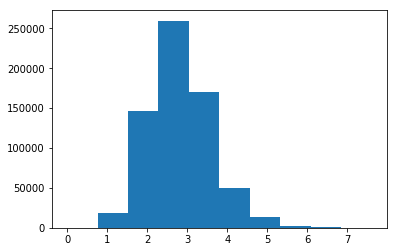

In [45]:
hist(np.log(data[data.shipping==1].price+1))

(array([  5.59000000e+02,   0.00000000e+00,   4.70070000e+04,
          3.60638000e+05,   2.76033000e+05,   1.03426000e+05,
          2.53340000e+04,   5.56200000e+03,   7.79000000e+02,
          9.70000000e+01]),
 array([ 0.      ,  0.760589,  1.521178,  2.281767,  3.042356,  3.802945,
         4.563534,  5.324123,  6.084712,  6.845301,  7.60589 ]),
 <a list of 10 Patch objects>)

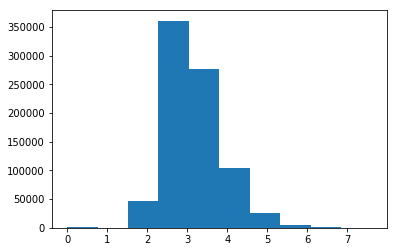

In [46]:
hist(np.log(data[data.shipping==0].price+1))

##  name

In [53]:
1.0*len(data.name.unique())/len(data)

0.8264715504187085

In [66]:
data['len_name']=map(lambda x : len(x),data.name)

In [57]:
data.len_name.mean()

25.847376284539656

In [66]:
data[['len_name','price']].groupby(['len_name']).describe()

price                                                        
            count       mean        std   min    25%   50%    75%     max
len_name                                                                 
1            15.0  30.266667  44.002381   7.0  11.00  16.0  27.50   185.0
2           190.0  38.252632  47.171525   3.0  12.25  22.0  45.75   309.0
3          1317.0  32.148823  47.413678   0.0   9.00  16.0  35.00   500.0
4          3326.0  25.266536  27.524999   0.0  12.00  18.0  30.00   554.0
5          4333.0  24.526425  38.454252   0.0  10.00  15.0  25.00  1325.0
6          8459.0  27.945738  39.270744   0.0  11.00  18.0  30.00  1815.0
7          7524.0  25.674708  38.003166   0.0  10.00  16.0  29.00  1500.0
8         12872.0  27.898695  45.845944   0.0  10.00  16.0  29.00  2000.0
9         13038.0  29.141318  41.953641   0.0  10.00  16.0  31.00  1000.0
10        19523.0  25.589254  37.596276   0.0  10.00  15.0  26.00  1806.0
11        25082.0  25.560163  36.673939   0.0  10.00  16.0  27.00  1350.0
12        27810.0  24.826969  35.080165   0.0  10.00  16.0  26.00  1800.0
13        32948.0  25.973807  41.215045   0.0  10.00  16.0  27.00  1609.0
14        35032.0  25.248773  34.003333   0.0  10.00  16.0  28.00  1015.0
15        37847.0  25.435186  38.503234   0.0  10.00  16.0  27.00  1359.0
16        42379.0  25.494726  33.236899   0.0  10.00  16.0  29.00  1350.0
17        43802.0  25.577485  34.473623   0.0  10.00  16.0  29.00  1309.0
18        47855.0  25.870964  35.329488   0.0  10.00  16.0  29.00  1909.0
19        53202.0  25.378651  33.762915   0.0  10.00  17.0  28.00   925.0
20        49125.0  25.673425  37.294743   0.0  10.00  16.0  28.00  1806.0
21        51100.0  25.508249  34.580999   0.0  10.00  16.0  29.00  1815.0
22        49765.0  25.616508  35.017477   0.0  10.00  16.0  29.00  1750.0
23        50872.0  26.016738  36.872210   0.0  10.00  16.0  29.00  1200.0
24        49484.0  25.849840  36.006986   0.0  10.00  17.0  29.00  1600.0
25        49129.0  26.193694  36.913428   0.0  10.00  16.0  29.00  2004.0
26        49846.0  26.066695  37.384258   0.0  10.00  16.0  29.00  1515.0
27        48563.0  26.477854  38.191622   0.0  10.00  17.0  29.00  1400.0
28        48048.0  26.090243  36.218356   0.0  10.00  17.0  29.00  2000.0
29        47015.0  26.626098  38.259975   0.0  11.00  17.0  30.00  2000.0
30        45802.0  26.489214  37.632121   0.0  10.00  17.0  29.00  1410.0
...           ...        ...        ...   ...    ...   ...    ...     ...
50           37.0  24.621622  25.384106   4.0  10.00  18.0  26.00   116.0
51           41.0  30.585366  28.739325   4.0  14.00  16.0  35.00   100.0
52           30.0  38.000000  50.911688   5.0  10.25  16.0  41.00   241.0
53           15.0  25.266667  24.935536   7.0  11.50  20.0  26.50   105.0
54           11.0  21.363636   7.089044  12.0  15.50  24.0  25.00    34.0
55           19.0  19.789474  18.721879   6.0   9.50  10.0  20.00    77.0
56            8.0  53.750000  58.428833  13.0  20.75  34.5  57.50   191.0
57            3.0  19.000000   7.810250  10.0  16.50  23.0  23.50    24.0
58            4.0  22.500000  17.058722  12.0  14.25  15.0  23.25    48.0
59            7.0  23.142857  20.931862   5.0  14.00  20.0  20.00    69.0
60           12.0  18.333333   6.358006   3.0  18.75  20.0  20.00    30.0
62            3.0  18.000000   6.000000  12.0  15.00  18.0  21.00    24.0
63            4.0  18.750000   8.460693  10.0  13.00  18.0  23.75    29.0
64            1.0  20.000000        NaN  20.0  20.00  20.0  20.00    20.0
65            2.0  13.000000   8.485281   7.0  10.00  13.0  16.00    19.0
66            3.0  53.333333  77.668097   7.0   8.50  10.0  76.50   143.0
67            1.0  54.000000        NaN  54.0  54.00  54.0  54.00    54.0
68            1.0  40.000000        NaN  40.0  40.00  40.0  40.00    40.0
70            1.0   8.000000        NaN   8.0   8.00   8.0   8.00     8.0
72            4.0  17.000000  11.372481  10.0  11.50  12.0  17.50    34.0
73            2.

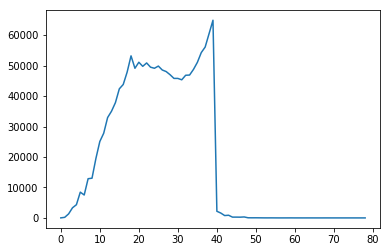

In [65]:
plot(xrange(len(data[['len_name','price']].groupby(['len_name']).count().price)),data[['len_name','price']].groupby(['len_name']).count().price)

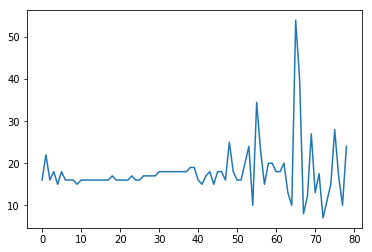

In [59]:
plot(xrange(79),data[['len_name','price']].groupby(['len_name']).median())
show()

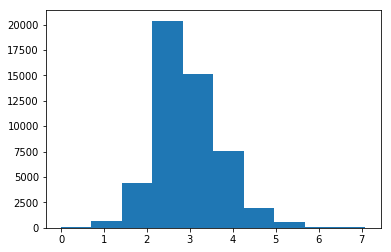

In [60]:
hist(np.log(data[data['len_name']==23].price+1))
show()

## brand_name

In [77]:
1.0*len(data[data.brand_name.isnull()==True])/len(data)

0.4267568725190299

In [78]:
len(data.brand_name.unique())

4810

In [81]:
data[data.brand_name.isnull()==True].describe(include=['O'])

,name,category_name,brand_name,item_description,Cat1,Cat2,Cat3
count,632682,629225,0.0,632679,629225,629225,629225
unique,550973,1270,0.0,533974,10,113,858
top,Bundle,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,No description yet,Women,Makeup,Other
freq,1226,23721,NaN,37373,210842,49199,31574


In [82]:
data[data.brand_name.isnull()==True].describe()

,train_id,item_condition_id,price,shipping,len_name
count,6.326820e+05,632682.000000,632682.000000,632682.000000,632682.000000
mean,7.413256e+05,1.737056,21.133453,0.525678,25.863567
std,4.280784e+05,0.876280,27.361260,0.499341,9.340483
min,0.000000e+00,1.000000,0.000000,0.000000,1.000000
25%,3.707592e+05,1.000000,9.000000,0.000000,19.000000
50%,7.418540e+05,1.000000,14.000000,1.000000,26.000000
75%,1.112027e+06,3.000000,24.000000,1.000000,34.000000
max,1.482534e+06,5.000000,2000.000000,1.000000,90.000000


##  item_description 


In [113]:
data.item_description=data.item_description.fillna('No Description')

In [115]:
print data.item_description[1]
data.price[1]

This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.


52.0

In [120]:
len_desc = list(map(lambda x:len(x),data.item_description))
len_desc

[18,
 188,
 124,
 173,
 41,
 102,
 83,
 268,
 48,
 297,
 44,
 108,
 19,
 18,
 194,
 151,
 55,
 427,
 307,
 193,
 38,
 68,
 336,
 60,
 301,
 108,
 49,
 34,
 81,
 156,
 123,
 18,
 36,
 59,
 741,
 111,
 109,
 80,
 168,
 113,
 317,
 292,
 42,
 189,
 149,
 116,
 216,
 133,
 412,
 197,
 44,
 213,
 134,
 142,
 224,
 70,
 18,
 112,
 3,
 76,
 125,
 186,
 63,
 79,
 48,
 9,
 74,
 186,
 69,
 441,
 43,
 139,
 952,
 37,
 106,
 31,
 195,
 367,
 37,
 37,
 108,
 536,
 45,
 427,
 69,
 263,
 366,
 33,
 18,
 107,
 18,
 48,
 106,
 78,
 37,
 169,
 453,
 189,
 82,
 199,
 272,
 39,
 32,
 103,
 70,
 92,
 93,
 73,
 135,
 9,
 235,
 36,
 30,
 75,
 255,
 41,
 38,
 18,
 71,
 251,
 137,
 408,
 68,
 254,
 293,
 184,
 33,
 335,
 204,
 18,
 765,
 65,
 29,
 52,
 280,
 27,
 81,
 100,
 698,
 87,
 3,
 14,
 68,
 101,
 148,
 69,
 238,
 30,
 97,
 276,
 591,
 102,
 44,
 123,
 571,
 12,
 100,
 10,
 254,
 134,
 103,
 78,
 70,
 181,
 77,
 74,
 173,
 50,
 67,
 29,
 41,
 183,
 18,
 116,
 77,
 990,
 91,
 159,
 701,
 463,
 26,
 724,


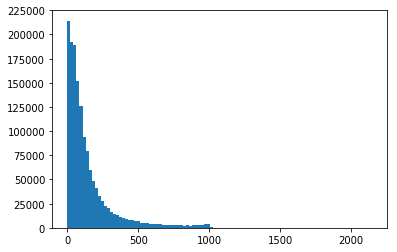

In [130]:
hist(len_desc,bins=100)
show()

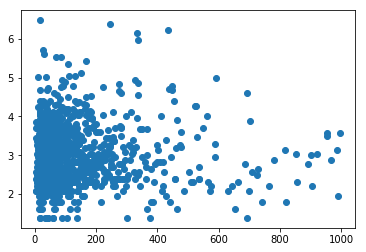

In [132]:
plot(len_desc[:1000],np.log(data.price[:1000]+1),"o")
show()

In [135]:
np.corrcoef(data.price,len_desc)

array([[ 1.        ,  0.04716878],
       [ 0.04716878,  1.        ]])


##  Prediction 

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split

In [68]:
print data.columns

Index([u'train_id', u'name', u'item_condition_id', u'category_name',
       u'brand_name', u'price', u'shipping', u'item_description', u'Cat1',
       u'Cat2', u'Cat3', u'len_name'],
      dtype='object')


In [69]:
data.Cat1= data.Cat1.fillna('NotPresent')
le = LabelEncoder()
le.fit(data.Cat1)
print len(le.classes_)
data['Cat1Tf'] = le.transform(data.Cat1) 


11


In [70]:
data.Cat2= data.Cat2.fillna('NotPresent')
le = LabelEncoder()
le.fit(data.Cat2)
print len(le.classes_)
data['Cat2Tf'] = le.transform(data.Cat2) 


114


In [71]:
data.Cat3= data.Cat3.fillna('NotPresent')
le = LabelEncoder()
le.fit(data.Cat3)
print len(le.classes_)
data['Cat3Tf'] = le.transform(data.Cat3) 


871


In [72]:
data.brand_name=data.brand_name.fillna('OTHERS')
le=LabelEncoder()
le.fit(data.brand_name)
print len(le.classes_)
data['brand_nameTf']= le.transform(data.brand_name) 


4810


In [44]:
data['log_price'] = np.log(data.price+1)
print data.log_price[200]
print data.price[200]

3.4657359028
31.0


In [45]:
print data.columns

Index([u'train_id', u'name', u'item_condition_id', u'category_name',
       u'brand_name', u'price', u'shipping', u'item_description', u'Cat1',
       u'Cat2', u'Cat3', u'len_name', u'Cat1Tf', u'Cat2Tf', u'Cat3Tf',
       u'brand_nameTf', u'log_price'],
      dtype='object')


In [46]:
data1 = data.drop([ 'price',u'Cat1',u'Cat2', u'Cat3','train_id','name','category_name','brand_name','item_description'],axis=1)
print data1.columns
#train, test = train_test_split(data, test_size=0.7)
#print train.columns

Index([u'item_condition_id', u'shipping', u'len_name', u'Cat1Tf', u'Cat2Tf',
       u'Cat3Tf', u'brand_nameTf', u'log_price'],
      dtype='object')


In [47]:
len(data[data.Cat1.isnull()==True])

0

In [48]:
trn_columns = ['item_condition_id','shipping','len_name','brand_nameTf', u'Cat1Tf',
       u'Cat2Tf', u'Cat3Tf']
targ = ['log_price']

In [49]:
train,test = train_test_split(data1,test_size=0.3)

In [50]:
del data1

### LinearRegression

In [22]:
lr=LinearRegression()
lr.fit(train[trn_columns],train[targ])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
preds = lr.predict(test[trn_columns])
print len(preds)

444761


In [24]:
np.sqrt(np.mean(np.square(preds-test[targ])))

log_price    0.720758
dtype: float64

### Ridge

In [58]:
from sklearn.linear_model import Ridge
rg=Ridge()
rg.fit(train[trn_columns],train[targ])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [59]:
preds = rg.predict(test[trn_columns])
print len(preds)

444761


In [60]:
np.sqrt(np.mean(np.square(preds-test[targ])))

log_price    0.721717
dtype: float64

### SVR

In [ ]:
svr = LinearSVR()
svr.fit(train[trn_columns],train[targ])

In [20]:
preds = svr.predict(test[trn_columns])
print len(preds)

444761


In [21]:
#np.sqrt(np.mean(np.square(np.log(preds+1)-np.log(test['price']+1))))
del svr,
np.sqrt(np.mean(np.square(preds-test[targ])))

ValueError: iterator is too large

In [ ]:
svrr = SVR()
svrr.fit(train[trn_columns],train[targ])

In [ ]:
preds = svrr.predict(test[trn_columns])
print len(preds)

In [ ]:
np.sqrt(np.mean(np.square(np.log(preds+1)-np.log(test['price']+1))))

### RandomForest

In [51]:
gbr=GradientBoostingRegressor()
gbr.fit(train[trn_columns],train[targ])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [52]:
preds = gbr.predict(test[trn_columns])

In [55]:
import gc
gc.collect()
np.sqrt(np.mean(np.square(preds-test[targ])))

ValueError: iterator is too large

### Adaboost

In [24]:
abr=AdaBoostRegressor()
abr.fit(train[trn_columns],train[targ])

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=500, random_state=None)

In [25]:
preds = abr.predict(test[trn_columns])

In [26]:
np.sqrt(np.mean(np.square(np.log(preds+1)-np.log(test['price']+1))))

0.90729559282341599

###  SGD

In [ ]:
sgd = SGDRegressor( n_iter=100)
sgd.fit(train[trn_columns],train[targ])

In [ ]:
preds = sgd.predict(test[trn_columns])
print preds

In [ ]:
np.sqrt(np.mean(np.square(np.log(preds+1)-np.log(test['price']+1))))

### MLP

In [ ]:
mlp = MLPRegressor()
mlp.fit(train[trn_columns],train[targ])

C:\Python27\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
preds = mlp.predict(test[trn_columns])

In [ ]:
#np.sqrt(np.mean(np.square(np.log(preds+1)-np.log(test['price']+1))))
np.sqrt(np.mean(np.square(preds-test[targ])